# K Nearest Neighbors with Python

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

## Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


## Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [4]:
df.shape

(11162, 17)

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
X=df.iloc[:, :-1]
print (df.shape)
print (X.shape)

y = df.iloc[:,-1]

(11162, 17)
(11162, 16)


## Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [13]:
print(confusion_matrix(y_test,pred))

[[1365  406]
 [ 478 1100]]


In [14]:
print(accuracy_score(y_test,pred))

0.7360406091370558


In [15]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      1771
           1       0.73      0.70      0.71      1578

    accuracy                           0.74      3349
   macro avg       0.74      0.73      0.73      3349
weighted avg       0.74      0.74      0.74      3349



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [16]:
accuracy_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    score = accuracy_score(y_test,pred)
    accuracy_rate.append(score)
    

In [17]:
accuracy_rate

[0.6987160346372051,
 0.7022991937891908,
 0.7360406091370558,
 0.7285756942370857,
 0.7509704389369961,
 0.7470886831890117,
 0.7551507912809794,
 0.7494774559570021,
 0.754255001492983,
 0.7545535980889818,
 0.7599283368169603,
 0.7539564048969841,
 0.7602269334129591,
 0.7566437742609734,
 0.7629143027769484,
 0.7611227232009555,
 0.7626157061809495,
 0.763511495968946,
 0.7647058823529411,
 0.7629143027769484,
 0.7632128993729471,
 0.7611227232009555,
 0.7629143027769484,
 0.7587339504329651,
 0.7608241266049567,
 0.7596297402209615,
 0.7626157061809495,
 0.7551507912809794,
 0.7593311436249627,
 0.754255001492983,
 0.7578381606449687,
 0.7563451776649747,
 0.7614213197969543,
 0.7566437742609734,
 0.7614213197969543,
 0.7593311436249627,
 0.7602269334129591,
 0.7560465810689758,
 0.7581367572409674]

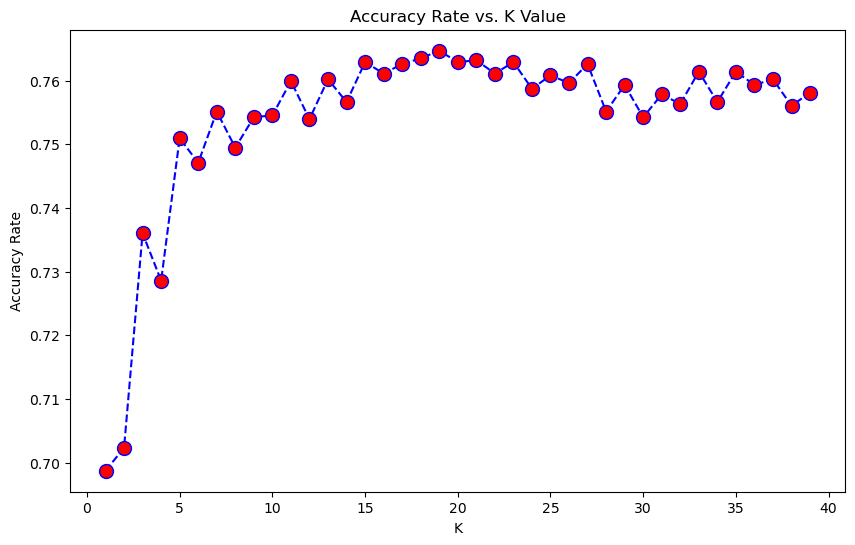

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

Here we can say k = 4 or 5 is better.

In [22]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=2
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=1


[[1546  225]
 [ 772  806]]


0.7022991937891908


In [25]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))

WITH K=21


[[1424  347]
 [ 446 1132]]


0.7632128993729471
